In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = pd.read_excel('data/data.xlsx')
data.shape

(2338, 5)

In [3]:
data = data[['Data Escala de Tempo 1 CE Simp 4', 'Selecione Tipo de CE Simp 4']]
data.columns = ['date','load']

In [4]:
data.head(15)

,date,load
0,2015-01-01 00:00:00,185.222881
1,2015-02-01 00:00:00,204.288036
2,2015-03-01 00:00:00,204.269012
3,2015-04-01 00:00:00,197.485360
4,2015-05-01 00:00:00,260.928703
5,2015-06-01 00:00:00,295.387895
6,2015-07-01 00:00:00,304.727506
7,2015-08-01 00:00:00,298.105968
8,2015-09-01 00:00:00,295.242392
9,2015-10-01 00:00:00,263.271449


In [5]:
init_date = datetime(2015, 1, 1)
init_date

datetime.datetime(2015, 1, 1, 0, 0)

In [6]:
datelist = pd.date_range(init_date, periods=len(data)).tolist()
print(len(datelist))
datelist[-5:]

2338


[Timestamp('2021-05-22 00:00:00', freq='D'),
 Timestamp('2021-05-23 00:00:00', freq='D'),
 Timestamp('2021-05-24 00:00:00', freq='D'),
 Timestamp('2021-05-25 00:00:00', freq='D'),
 Timestamp('2021-05-26 00:00:00', freq='D')]

In [7]:
df = pd.DataFrame(data=data.load.values, index=datelist, columns=['Energy_Load'])
df.head(15)

,Energy_Load
2015-01-01,185.222881
2015-01-02,204.288036
2015-01-03,204.269012
2015-01-04,197.485360
2015-01-05,260.928703
2015-01-06,295.387895
2015-01-07,304.727506
2015-01-08,298.105968
2015-01-09,295.242392
2015-01-10,263.271449


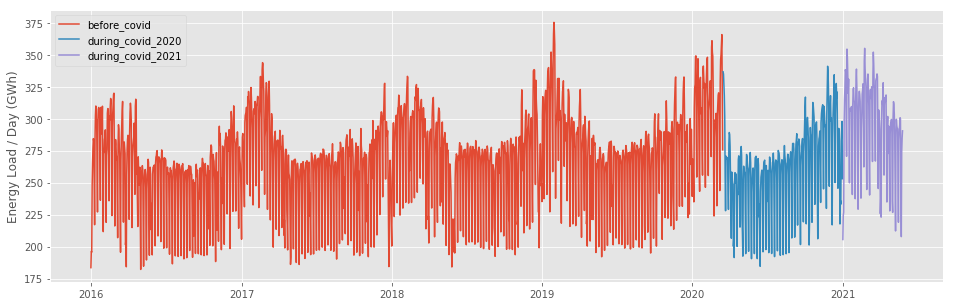

In [8]:
plt.figure(figsize=[16,5])
plt.plot(df.loc['2016-01-01':'2020-03-15','Energy_Load'], label="before_covid")
plt.plot(df.loc['2020-03-16':'2020-12-31','Energy_Load'], label="during_covid_2020")
plt.plot(df.loc['2021-01-01':'2021-12-31','Energy_Load'], label="during_covid_2021")
plt.legend()
plt.ylabel('Energy Load / Day (GWh)')
# plt.savefig('imgs/fig1.png')
plt.show()

In [9]:
df['date'] = df.index
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year

In [10]:
df.head()

,Energy_Load,date,month,year
2015-01-01,185.222881,2015-01-01,1,2015
2015-01-02,204.288036,2015-01-02,1,2015
2015-01-03,204.269012,2015-01-03,1,2015
2015-01-04,197.485360,2015-01-04,1,2015
2015-01-05,260.928703,2015-01-05,1,2015


In [11]:
df_month = df.groupby(['year','month']).mean()
df_month.head()

Energy_Load
year month             
2015 1       278.650721
     2       280.969876
     3       278.948576
     4       251.792452
     5       236.106553

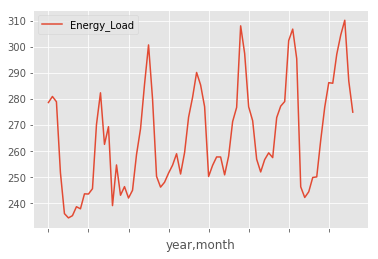

In [12]:
df_month.plot()

In [13]:
tmp = df_month.reset_index(drop=False)

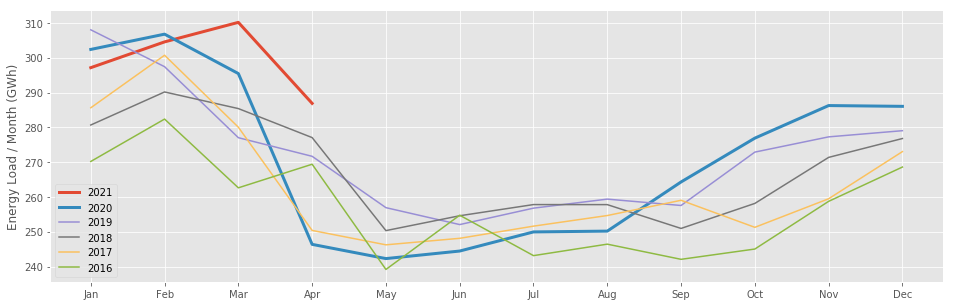

In [14]:
plt.figure(figsize=[16,5])
plt.plot(tmp[tmp.year==2021].Energy_Load.values[:-1], label='2021', linewidth=3)
plt.plot(tmp[tmp.year==2020].Energy_Load.values, label='2020', linewidth=3)
plt.plot(tmp[tmp.year==2019].Energy_Load.values, label='2019')
plt.plot(tmp[tmp.year==2018].Energy_Load.values, label='2018')
plt.plot(tmp[tmp.year==2017].Energy_Load.values, label='2017')
plt.plot(tmp[tmp.year==2016].Energy_Load.values, label='2016')

plt.xticks([i for i in range(12)], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Energy Load / Month (GWh)')
plt.legend()
# plt.savefig('imgs/fig2.png')
plt.show()

In [15]:
new_times = pd.date_range(init_date - timedelta(1), freq='1M', periods=len(tmp)) + timedelta(1)
tmp2 = tmp.copy()
tmp2.index = new_times

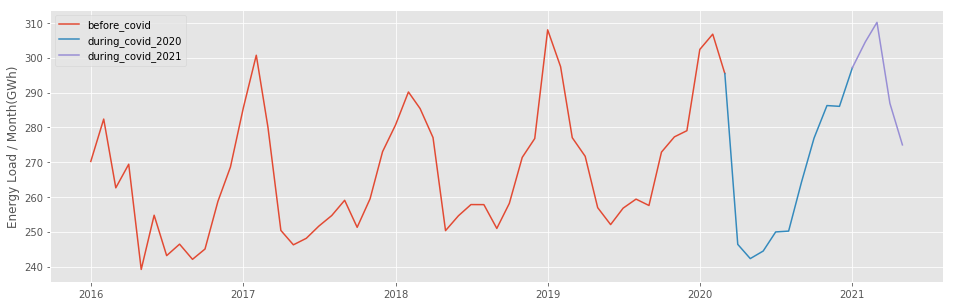

In [16]:
plt.figure(figsize=[16,5])
plt.plot(tmp2.loc['2016-01-01':'2020-03-15','Energy_Load'], label="before_covid")
plt.plot(tmp2.loc['2020-03-01':'2021-01-01','Energy_Load'], label="during_covid_2020")
plt.plot(tmp2.loc['2021-01-01':'2021-12-31','Energy_Load'], label="during_covid_2021")
plt.legend()
plt.ylabel('Energy Load / Month(GWh)')
# plt.savefig('imgs/fig3.png')
plt.show()

In [17]:
df.head()

,Energy_Load,date,month,year
2015-01-01,185.222881,2015-01-01,1,2015
2015-01-02,204.288036,2015-01-02,1,2015
2015-01-03,204.269012,2015-01-03,1,2015
2015-01-04,197.485360,2015-01-04,1,2015
2015-01-05,260.928703,2015-01-05,1,2015


In [18]:
tmp3 = df.resample('7D').mean()[['Energy_Load']]
tmp3.shape

(334, 1)

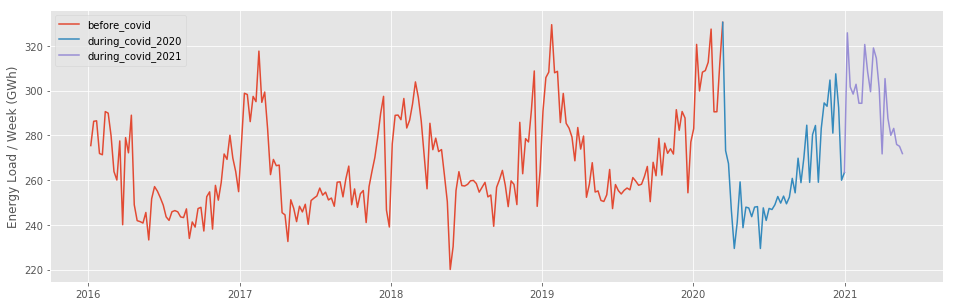

In [19]:
plt.figure(figsize=[16,5])
plt.plot(tmp3.loc['2016-01-01':'2020-03-15','Energy_Load'], label="before_covid")
plt.plot(tmp3.loc['2020-03-07':'2020-12-31','Energy_Load'], label="during_covid_2020")
plt.plot(tmp3.loc['2020-12-26':'2021-05-27','Energy_Load'], label="during_covid_2021")
plt.legend()
plt.ylabel('Energy Load / Week (GWh)')
# plt.savefig('imgs/fig4.png')
plt.show()

In [20]:
tmp3.min()

Energy_Load    219.450648
dtype: float64

In [21]:
tmp3[tmp3.Energy_Load < 221]

,Energy_Load
2015-09-03,219.450648
2015-12-24,219.573322
2018-05-24,220.086019
